In [2]:
from statsmodels.stats.multitest import fdrcorrection
from statsmodels.compat import lzip
import statsmodels.api as sm
from statsmodels.formula.api import ols
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

In [3]:
dF = pd.read_csv("../curatedData/cytokineFormatted_Feb2023.csv")

In [4]:
dF.head()

,concentraction,IFNG,IL-4,GATA3,Tbet,testType
0,10.0,9.79,0.08,322.11,1008.11,Train
1,10.0,10.61,0.23,346.01,1001.44,Train
2,10.0,11.95,0.08,397.71,1255.95,Train
3,10.0,13.04,0.07,345.83,1404.03,Train
4,10.0,13.97,0.09,361.03,1497.34,Train


In [5]:
dF["G_T"] = dF.GATA3/dF.Tbet
dF.head()

,concentraction,IFNG,IL-4,GATA3,Tbet,testType,G_T
0,10.0,9.79,0.08,322.11,1008.11,Train,0.319519
1,10.0,10.61,0.23,346.01,1001.44,Train,0.345512
2,10.0,11.95,0.08,397.71,1255.95,Train,0.316661
3,10.0,13.04,0.07,345.83,1404.03,Train,0.246312
4,10.0,13.97,0.09,361.03,1497.34,Train,0.241114


## Figure 6D code and data

In [6]:
def funcHill(tf, y_max, k, h):
    return (y_max*(tf**h/(k**h + tf**h)))

# cytokine = 'IL-4'
# TF = 'GATA3'

def exprHILLeq(cytokine, TF):
    xdata = dF[TF] #['Tbet']
    ydata = dF[cytokine] # ['IFNG']

    p0 = [max(ydata),10,0]
    popt, pcov = curve_fit(funcHill, xdata, ydata, p0,method='lm',maxfev=20000)
    x_test = np.linspace(min(xdata), max(xdata), 100)
    y_pred = funcHill(xdata, *(popt))
    score = r2_score(ydata, y_pred)
    print ("learnt:\nY_max :{}\nK : {} \nh: {}".format(popt[0],popt[1],popt[2]))

    print ("Module R-square value {:.3f}.".format(score))
    # CI
    sigma_ab = np.sqrt(np.diagonal(pcov))
    bound_upper = funcHill(x_test, *(popt + sigma_ab))
    bound_lower = funcHill(x_test, *(popt - sigma_ab))
    
    y_out = funcHill(x_test, *popt)
    #plot
    plt.figure(figsize=(4,3))
    plt.plot(x_test, y_out,'r--', label="R-Square: {:.3f}".format(score))
    sns.scatterplot(x=TF,y=cytokine,data=dF)#,hue='concentraction',palette=['blue','green','magenta','red'])
    plt.fill_between(x_test, bound_lower, bound_upper,color = 'black', alpha = 0.15,label="CI")
    plt.ylabel("%Exprssion {} ".format(cytokine),fontdict={'size':14,'family':'sans-serif'})
    plt.xlabel("{} MFI".format(TF), fontdict={'size':14,'family':'sans-serif'})
    plt.show()
    
    ## data
    outdata_test = pd.DataFrame(zip(x_test, y_out,bound_lower, bound_upper),columns=["{}_test".format(cytokine),"{}_test".format(TF),"CI_low","CI_upper"])
    outdata_train = pd.DataFrame(zip(xdata, ydata),columns=["{}_train".format(cytokine),"{}_train".format(TF)])
    outdata_test.to_csv("../figData_6D_23May23/{}_{}_test.csv".format(cytokine,TF),index=False)
    outdata_train.to_csv("../figData_6D_23May23/{}_{}_train.csv".format(cytokine,TF),index=False)
    return ([cytokine, TF, score, popt[0],popt[1],popt[2], 'HillEquation'])
    

learnt:
Y_max :21.47239972245803
K : 1199.0995527518696 
h: 3.3039759238050843
Module R-square value 0.904.


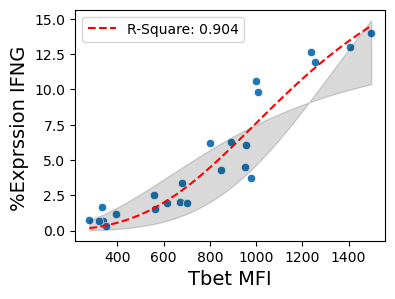

/var/folders/t3/68lkvp7d7dlcctl6w91ml6yj8cs2fb/T/ipykernel_19486/4095191007.py:2: RuntimeWarning: invalid value encountered in double_scalars
  return (y_max*(tf**h/(k**h + tf**h)))


learnt:
Y_max :87364.12016529866
K : 0.705483417926874 
h: -1.4423963480173245
Module R-square value 0.872.


/var/folders/t3/68lkvp7d7dlcctl6w91ml6yj8cs2fb/T/ipykernel_19486/4095191007.py:2: RuntimeWarning: invalid value encountered in double_scalars
  return (y_max*(tf**h/(k**h + tf**h)))


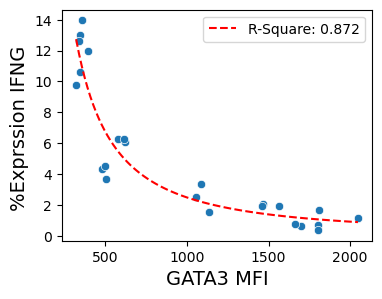

/var/folders/t3/68lkvp7d7dlcctl6w91ml6yj8cs2fb/T/ipykernel_19486/4095191007.py:2: RuntimeWarning: invalid value encountered in double_scalars
  return (y_max*(tf**h/(k**h + tf**h)))


learnt:
Y_max :629049.7583611844
K : 2.7851913647101436e-06 
h: -0.944562528158763
Module R-square value 0.941.


/var/folders/t3/68lkvp7d7dlcctl6w91ml6yj8cs2fb/T/ipykernel_19486/4095191007.py:2: RuntimeWarning: invalid value encountered in double_scalars
  return (y_max*(tf**h/(k**h + tf**h)))


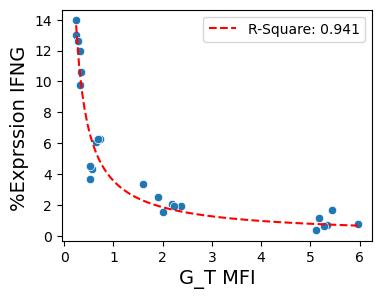

learnt:
Y_max :34.63620885433424
K : 602.1703804010673 
h: -5.071864191877635
Module R-square value 0.817.


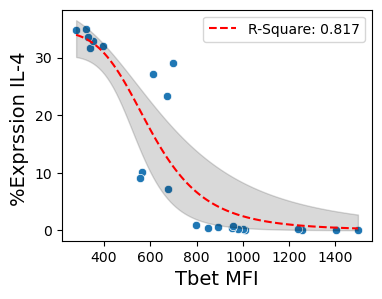

learnt:
Y_max :35.23783605057202
K : 1267.01477000086 
h: 7.753136216530146
Module R-square value 0.991.


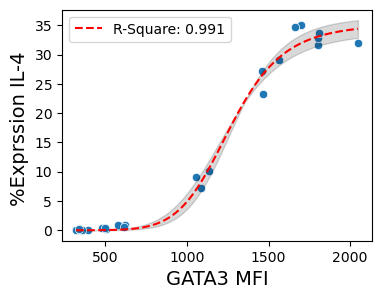

learnt:
Y_max :33.37422614792307
K : 2.0578703951456703 
h: 13.18137619804429
Module R-square value 0.983.


/var/folders/t3/68lkvp7d7dlcctl6w91ml6yj8cs2fb/T/ipykernel_19486/4095191007.py:2: RuntimeWarning: invalid value encountered in double_scalars
  return (y_max*(tf**h/(k**h + tf**h)))


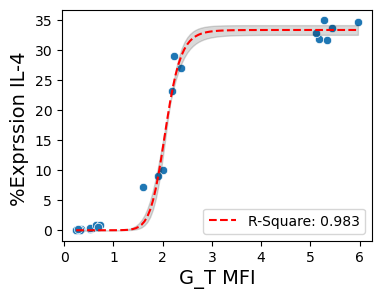

In [7]:
resHIlleq = []
for cyo in ['IFNG','IL-4']:
    for tf in ['Tbet','GATA3','G_T']:
        outx = exprHILLeq(cyo,tf)
        resHIlleq.append(outx)

In [8]:
resHillEq = pd.DataFrame(resHIlleq, columns=['Cytokine','TF','R-Square','Y_max','K','h','EqationType'])
resHillEq

,Cytokine,TF,R-Square,Y_max,K,h,EqationType
0,IFNG,Tbet,0.903916,21.472400,1199.099553,3.303976,HillEquation
1,IFNG,GATA3,0.871995,87364.120165,0.705483,-1.442396,HillEquation
2,IFNG,G_T,0.940897,629049.758361,0.000003,-0.944563,HillEquation
3,IL-4,Tbet,0.817465,34.636209,602.170380,-5.071864,HillEquation
4,IL-4,GATA3,0.990540,35.237836,1267.014770,7.753136,HillEquation
5,IL-4,G_T,0.983337,33.374226,2.057870,13.181376,HillEquation


In [100]:
resHillEq.to_csv("../curatedData/resultofHillEquationfitting.csv")

## Alternative model fitting from Helmstetter 2015 Immunity and a custome sigmoid model

In [9]:
# ifng = ifng_max + (TF/K+TF)
def functx(tf, y_max, k): 
    return (y_max*(tf/(k+tf)))

# function to fit sigmoid like function
def func_objective(x, y_max, k, x_mid, x_min):
    return y_max/(np.exp(k*(x-x_mid)) + 1.0) + x_min

In [10]:


def fitData_expo(cytokine, transcFact,k):
    xdata = dF[transcFact] #['Tbet']
    ydata = dF[cytokine] # ['IFNG']
    # p0 = [ymax, K, xdata_normfacor, ydata_scale factor]
    p0 = [max(ydata),k ,np.median(xdata),min(ydata)] # this is an mandatory initial guess

    popt, pcov = curve_fit(func_objective, xdata, ydata,p0,method='dogbox')

    x_test = np.linspace(min(xdata), max(xdata), 100)
    y_pred = func_objective(xdata, *(popt))
    score = r2_score(ydata, y_pred)
    print ("Module R-square value {:.3f}.".format(score))
    plt.figure(figsize=(4,3))
    plt.plot(x_test, func_objective(x_test, *popt),'r--', label="R-Square: {:.3f}".format(score))
    sns.scatterplot(x=transcFact,y=cytokine,data=dF)#,hue='concentraction',palette=['blue','green','magenta','red'])
    
    sigma_ab = np.sqrt(np.diagonal(pcov))
    bound_upper = func_objective(x_test, *(popt + sigma_ab))
    bound_lower = func_objective(x_test, *(popt - sigma_ab))
    plt.fill_between(x_test, bound_lower, bound_upper,color = 'black', alpha = 0.15,label="CI")
    plt.xlabel("{} MFI".format(transcFact),fontdict={'size':14,'family':'sans-serif'})
    plt.ylabel("% Exprssion {}".format(cytokine), fontdict={'size':14,'family':'sans-serif'})
    return ([cytokine, transcFact, score, popt[0],popt[1],'Expofunction'])


def fitData_linear(cytokine, transcFact, k=0.01):
    xdata = dF[transcFact] #['Tbet']
    ydata = dF[cytokine] # ['IFNG']
    # p0 = [ymax, K, xdata_normfacor, ydata_scale factor]
    # p0 = [max(ydata),k] # this is an mandatory initial guess
    
    popt, pcov = curve_fit(functx, xdata, ydata,method='dogbox')
    x_test = np.linspace(min(xdata), max(xdata), 100)
    y_pred = functx(xdata, *(popt))
    score = r2_score(ydata, y_pred)
    print ("Y_max and K learnt: ", popt)
    print ("Module R-square value {:.3f}.".format(score))
    # CI
    sigma_ab = np.sqrt(np.diagonal(pcov))
    bound_upper = functx(x_test, *(popt + sigma_ab))
    bound_lower = functx(x_test, *(popt - sigma_ab))
    
    y_out = functx(x_test, *popt)
    #plot
    plt.figure(figsize=(4,3))
    plt.plot(x_test, y_out,'r--', label="R-Square: {:.3f}".format(score))
    sns.scatterplot(x=transcFact,y=cytokine,data=dF)#,hue='concentraction',palette=['blue','green','magenta','red'])
    plt.fill_between(x_test, bound_lower, bound_upper,color = 'black', alpha = 0.15,label="CI")
    plt.xlabel("{} MFI".format(transcFact),fontdict={'size':14,'family':'sans-serif'})
    plt.ylabel("% Exprssion {}".format(cytokine), fontdict={'size':14,'family':'sans-serif'})
    
    #out data
    
    outdata_test = pd.DataFrame(zip(x_test, y_out,bound_lower, bound_upper),columns=["{}_test".format(cytokine),"{}_test".format(transcFact),"CI_low","CI_upper"])
    outdata_train = pd.DataFrame(zip(xdata, ydata),columns=["{}_train".format(cytokine),"{}_train".format(transcFact)])
    outdata_test.to_csv("../figData_S6_23May23/{}_{}_test.csv".format(cytokine,transcFact),index=False)
    outdata_train.to_csv("../figData_S6_23May23/{}_{}_train.csv".format(cytokine,transcFact),index=False)
    
    return ([cytokine, transcFact, score, popt[0],popt[1],'LinearFunction'])


    

Y_max and K learnt:  [   2.48730815 -265.70527152]
Module R-square value 0.755.
Y_max and K learnt:  [  248288.21435363 33553404.99624545]
Module R-square value 0.721.
Y_max and K learnt:  [ 3.0820379  -0.19315293]
Module R-square value 0.788.
Y_max and K learnt:  [ 1085946.77137738 69204984.99362168]
Module R-square value 0.796.
Y_max and K learnt:  [   7.41965745 -232.7082035 ]
Module R-square value 0.526.
Y_max and K learnt:  [144.19689512  17.47961324]
Module R-square value 0.893.


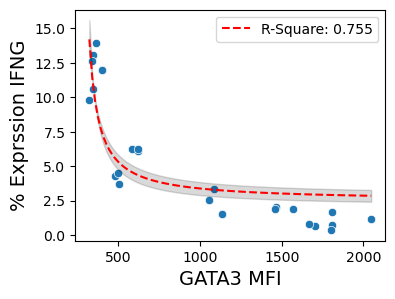

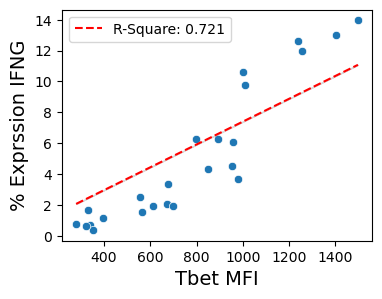

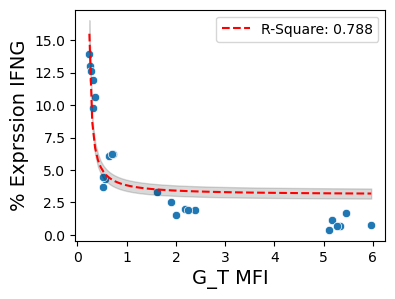

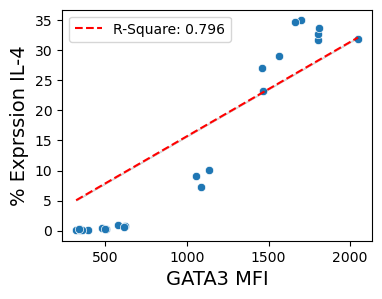

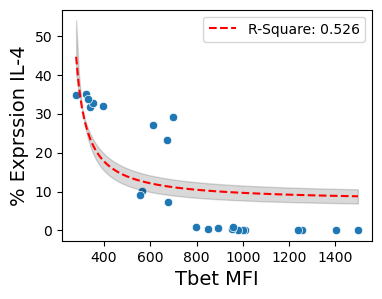

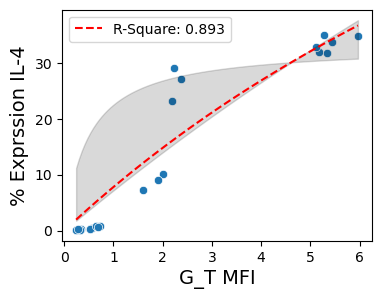

In [11]:
linear_result = []
for cyo in ['IFNG','IL-4']:
    for tf in ['GATA3','Tbet','G_T']:
        outx = fitData_linear(cyo,tf)
        linear_result.append(outx)
        
linear_result = pd.DataFrame(linear_result, columns=['Cytokine','TF','R-Sqaure','K','Y_Max','FittingFunction'])

In [12]:
linear_result

,Cytokine,TF,R-Sqaure,K,Y_Max,FittingFunction
0,IFNG,GATA3,0.754732,2.487308e+00,-2.657053e+02,LinearFunction
1,IFNG,Tbet,0.721005,2.482882e+05,3.355340e+07,LinearFunction
2,IFNG,G_T,0.788064,3.082038e+00,-1.931529e-01,LinearFunction
3,IL-4,GATA3,0.796346,1.085947e+06,6.920498e+07,LinearFunction
4,IL-4,Tbet,0.525699,7.419657e+00,-2.327082e+02,LinearFunction
5,IL-4,G_T,0.892901,1.441969e+02,1.747961e+01,LinearFunction
